# Opportunity to open new restaurant near Ragsit University, The university in Thailand!

##### Hello everyone, my name is Chayanant form Thailand. My home is near Rangsit University and I have seen a lot of restaurant open and close a lot for 24 years. Now a lot of them still open but if it already have it a lot, is it still have an opportunity to open new restaurant around there let find out together.

***

### Let's Import all what we need

In [246]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.16.0                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


In [247]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: MCOXNCSKZQZZSF4BPTRHIGIFXCOEQHDZTOLKBK3DAFRECKXZ
CLIENT_SECRET:0D5NZKGXZOPAS1RP3NQVWJOTUJVELSHJS1ZUNBRDZCTNEKN5


## Find COORDINATES Rangsit University

In [248]:
address = 'rangsit university, thailand'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/geopy/geocoders/osm.py:138: UserWarning: Using Nominatim with the default "geopy/1.16.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


13.96650865 100.584230004539


### Start Query Each Type of restaurant

#### Defind Type of restaurant and radius

In [249]:
jap_query = 'japanese'
thai_query = 'thai'
chinese_query = 'chinese'
italian_query = 'italian'
radius = 2000

#### Difind URL

In [250]:
jap_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, jap_query, radius, LIMIT)
thai_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, thai_query, radius, LIMIT)
chinese_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, chinese_query, radius, LIMIT)
italian_url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, italian_query, radius, LIMIT)


### Get Database

In [251]:
jap_results = requests.get(jap_url).json()
thai_results = requests.get(thai_url).json()
chinese_results = requests.get(chinese_url).json()
italian_results = requests.get(italian_url).json()

### Create Dataframe of each type of restaurant

### Japanese

In [252]:
jap_venues = jap_results['response']['venues']

jap_dataframe = json_normalize(venues)

jap_filtered_columns = ['name', 'categories'] + [col for col in jap_dataframe.columns if col.startswith('location.')] + ['id']
jap_dataframe_filtered = jap_dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        
        return categories_list[0]['name']
jap_dataframe_filtered['categories'] = jap_dataframe_filtered.apply(get_category_type, axis=1) 

jap_dataframe_filtered.columns = [column.split('.')[-1] for column in jap_dataframe_filtered.columns]

print(jap_dataframe_filtered['name'].head(3))
jap_dataframe_filtered.head()

0              Uminari Japanese Restaurant
1    Bake a wish || Japanese homemade cake
2                Daiki Japanese Restaurant
Name: name, dtype: object


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Uminari Japanese Restaurant,Japanese Restaurant,Meung-ake,TH,รังสิต,ประเทศไทย,1097,"[Meung-ake, รังสิต, ปทุมธานี, ประเทศไทย]","[{'lng': 100.59407011636124, 'label': 'display...",13.964069,100.594070,ปทุมธานี,54351bbc498e1873d1b03166
1,Bake a wish || Japanese homemade cake,Bakery,Student center RSU,TH,บ้านรังสิต,ประเทศไทย,347,"[Student center RSU, บ้านรังสิต, ปทุมธานี, ประ...","[{'lng': 100.58636112499175, 'label': 'display...",13.964169,100.586361,ปทุมธานี,5837e5a6ce593d4164df4fc8
2,Daiki Japanese Restaurant,Japanese Restaurant,NaN,TH,NaN,ประเทศไทย,300,[ประเทศไทย],"[{'lng': 100.58624579024476, 'label': 'display...",13.964645,100.586246,NaN,58902fd6288b6a4be1344b39
3,Japanese Class,College Academic Building,NaN,TH,NaN,ประเทศไทย,433,[ประเทศไทย],"[{'lng': 100.5862842, 'label': 'display', 'lat...",13.963163,100.586284,NaN,4f6c0198e4b07fa2c4512f1c
4,Yaki Grill | Japanese BBQ Buffet,None,หน้า ม.รังสิต,TH,Lak Hok,ประเทศไทย,383,"[หน้า ม.รังสิต, Lak Hok, ปทุมธานี, ประเทศไทย]","[{'lng': 100.587733, 'label': 'display', 'lat'...",13.967088,100.587733,ปทุมธานี,4d3eb8e6457cb60c0aed02a5


### Thai

In [253]:
thai_venues = thai_results['response']['venues']
thai_dataframe = json_normalize(thai_venues)
print(thai_dataframe['name'].head(3))
thai_dataframe.head(3)

thai_filtered_columns = ['name', 'categories'] + [col for col in thai_dataframe.columns if col.startswith('location.')] + ['id']
thai_dataframe_filtered = thai_dataframe.loc[:, filtered_columns]

thai_dataframe_filtered['categories'] = thai_dataframe_filtered.apply(get_category_type, axis=1) 

thai_dataframe_filtered.columns = [column.split('.')[-1] for column in thai_dataframe_filtered.columns]

print(thai_dataframe_filtered['name'].head(3))
thai_dataframe_filtered.head()


0    Sun Hurb Thai Chinese Manufacturing (ซันเฮิร์บ...
1                   Pad thai Mother (ผัด-ไทย-มา-เทอร์)
2                             Thai Stick, Sanfrancisco
Name: name, dtype: object
0    Sun Hurb Thai Chinese Manufacturing (ซันเฮิร์บ...
1                   Pad thai Mother (ผัด-ไทย-มา-เทอร์)
2                             Thai Stick, Sanfrancisco
Name: name, dtype: object


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Sun Hurb Thai Chinese Manufacturing (ซันเฮิร์บ...,College Lab,มหาวิทยาลัยรังสิต,TH,รังสิต,ประเทศไทย,76,"[มหาวิทยาลัยรังสิต, รังสิต, ปทุมธานี, ประเทศไทย]","[{'lng': 100.5842, 'label': 'display', 'lat': ...",13.965820,100.584200,ปทุมธานี,508f57d1e4b095c5d7433520
1,Pad thai Mother (ผัด-ไทย-มา-เทอร์),Thai Restaurant,Opposite Bundit Apartment,TH,Meang-Ake,ประเทศไทย,657,"[Opposite Bundit Apartment, Meang-Ake, Patumt...","[{'lng': 100.58086123869016, 'label': 'display...",13.961589,100.580861,Patumthanee,4e428eafaeb79367c7e8ca0a
2,"Thai Stick, Sanfrancisco",American Restaurant,NaN,TH,ปทุมธานี,ประเทศไทย,1618,"[ปทุมธานี, ปทุมธานี, ประเทศไทย]","[{'lng': 100.59911, 'label': 'display', 'lat':...",13.964820,100.599110,ปทุมธานี,4e76d9baae60c32851bf85ff
3,ก๋วยเตี๋ยวเรือนวลจันทร์ nualchan thai noodle r...,None,NaN,TH,NaN,ประเทศไทย,123,[ประเทศไทย],"[{'lng': 100.58530417214176, 'label': 'display...",13.966125,100.585304,NaN,4e819a6529c235eaae0e5c70
4,DGA360 Thai Art For Digital Art Class,College Classroom,8th Building RSU,TH,NaN,ประเทศไทย,203,"[8th Building RSU, ประเทศไทย]","[{'lng': 100.584765, 'label': 'display', 'lat'...",13.964756,100.584765,NaN,53f19b03498e9505bd52866f


###   Chinese

In [254]:
chinese_venues = chinese_results['response']['venues']
chinese_dataframe = json_normalize(chinese_venues)

chinese_filtered_columns = ['name', 'categories'] + [col for col in chinese_dataframe.columns if col.startswith('location.')] + ['id']
chinese_dataframe_filtered = chinese_dataframe.loc[:, filtered_columns]

chinese_dataframe_filtered['categories'] = chinese_dataframe_filtered.apply(get_category_type, axis=1) 

chinese_dataframe_filtered.columns = [column.split('.')[-1] for column in chinese_dataframe_filtered.columns]

print(chinese_dataframe_filtered['name'].head(3))
chinese_dataframe_filtered.head()

0    Sun Hurb Thai Chinese Manufacturing (ซันเฮิร์บ...
1                   Chinese Major | Rangsit University
2                             panda chinese restaurant
Name: name, dtype: object


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Sun Hurb Thai Chinese Manufacturing (ซันเฮิร์บ...,College Lab,มหาวิทยาลัยรังสิต,TH,รังสิต,ประเทศไทย,76,"[มหาวิทยาลัยรังสิต, รังสิต, ปทุมธานี, ประเทศไทย]","[{'lng': 100.5842, 'label': 'display', 'lat': ...",13.965820,100.584200,ปทุมธานี,508f57d1e4b095c5d7433520
1,Chinese Major | Rangsit University,None,NaN,TH,NaN,ประเทศไทย,130,[ประเทศไทย],"[{'lng': 100.585262, 'label': 'display', 'lat'...",13.965905,100.585262,NaN,4f055811a69d735e258db676
2,panda chinese restaurant,Chinese Restaurant,NaN,TH,NaN,ประเทศไทย,1028,[ประเทศไทย],"[{'lng': 100.57756546128596, 'label': 'display...",13.959917,100.577565,NaN,5277f38911d28b231879fb99


###  Italian

In [255]:
italian_venues = italian_results['response']['venues']
italian_dataframe = json_normalize(italian_venues)

italian_filtered_columns = ['name', 'categories'] + [col for col in italian_dataframe.columns if col.startswith('location.')] + ['id']
italian_dataframe_filtered = italian_dataframe.loc[:, filtered_columns]

italian_dataframe_filtered['categories'] = italian_dataframe_filtered.apply(get_category_type, axis=1) 

italian_dataframe_filtered.columns = [column.split('.')[-1] for column in italian_dataframe_filtered.columns]

print(italian_dataframe_filtered['name'].head(3))
italian_dataframe_filtered.head()

0    Italian Homemade Pizza
1        Afro Pizza Italian
Name: name, dtype: object


,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,state,id
0,Italian Homemade Pizza,Italian Restaurant,ถนนเอกทักษิณ,TH,อ.เมือง,ประเทศไทย,1365,"[ถนนเอกทักษิณ, อ.เมือง, จ.ปทุมธานี 12000, ประเ...","[{'lng': 100.59682550075307, 'label': 'display...",13.965508,100.596826,จ.ปทุมธานี,4ddf3bbd227140b904fce85c
1,Afro Pizza Italian,Pizza Place,NaN,TH,Muang Pathum Thani,ประเทศไทย,1116,"[Muang Pathum Thani, ปทุมธานี, ประเทศไทย]","[{'lng': 100.592787, 'label': 'display', 'lat'...",13.960890,100.592787,ปทุมธานี,4e0860c1fa767637fd303563


## Create Map

In [256]:
chinese_query = 'chinese'
italian_query

venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around rangsit university

folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='orange',
    popup='Rangsit University',
    fill = True,
    fill_color = 'orange',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Japanese restaurants as blue circle markers
for lat, lng, label in zip(jap_dataframe_filtered.lat, jap_dataframe_filtered.lng, jap_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Thai restaurants as blue circle markers
for lat, lng, label in zip(thai_dataframe_filtered.lat, thai_dataframe_filtered.lng, thai_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Chinese restaurants as blue circle markers
for lat, lng, label in zip(chinese_dataframe_filtered.lat, chinese_dataframe_filtered.lng, chinese_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=label,
        fill = True,
        fill_color='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# add the Italian restaurants as green circle markers
for lat, lng, label in zip(italian_dataframe_filtered.lat, italian_dataframe_filtered.lng, italian_dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=label,
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Let's do some analysis

### manipulate data

In [257]:
jap_dataframe_filtered['type'] = 'japanese'
thai_dataframe_filtered['type'] = 'thai'
chinese_dataframe_filtered['type'] = 'chinese'
italian_dataframe_filtered['type'] = 'italian'

AllRes = pd.DataFrame()
AllRes = pd.concat([jap_dataframe_filtered,thai_dataframe_filtered,chinese_dataframe_filtered,italian_dataframe_filtered])
AllResList = AllRes[['name','distance', 'type','id']]

#### Count Each Restaurants

In [258]:
AllResList.groupby('type').count()

,name,distance,id
type,,,
chinese,3,3,3
italian,2,2,2
japanese,18,18,18
thai,24,24,24


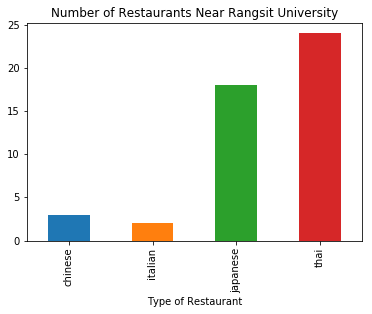

In [259]:
import matplotlib.pyplot as plt
AllResList.groupby('type')['name'].count().plot(kind = 'bar')

plt.title('Number of Restaurants Near Rangsit University')
plt.xlabel('Type of Restaurant')
plt.show()

##### Now we can see that a lot Thai and Japanese around there. We should go to the Red ocean, we dicide to look
##### for new opertunity in chinese and italian Restaurants

##### Note : Unfortunately the data of Rating restaurants around there not have on Foursquare, maybe it that because Foursquare not popular in Thailand.

### How about dictance?

In [260]:
avgDis = AllResList.groupby('type')['distance'].mean()
avgDis

type
chinese      411.333333
italian     1240.500000
japanese     875.333333
thai         995.625000
Name: distance, dtype: float64

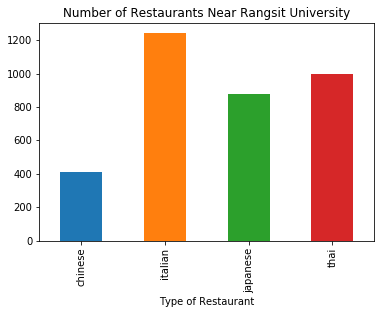

In [261]:
avgDis.plot(kind = 'bar')

plt.title('Number of Restaurants Near Rangsit University')
plt.xlabel('Type of Restaurant')
plt.show()

### Finally, we see the opertinity in italian restaurant the most because it's have only 2 restaurant near to the university and 2 of them not close to the university.